# **1. Import Library**

In [24]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# **2. Read Dataset**

In [25]:
# Memuat dataset Linnerud dari scikit-learn dan mengonversinya menjadi DataFrame
linnerud = datasets.load_linnerud()

X = linnerud.data
y = linnerud.target

# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=linnerud.feature_names)
df_y = pd.DataFrame(y, columns=linnerud.target_names)

# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X.reset_index(drop=True), df_y.reset_index(drop=True)], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [27]:
df_y.nunique()

,0
Weight,16
Waist,9
Pulse,11


In [28]:
df.describe()

,Chins,Situps,Jumps,Weight,Waist,Pulse
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


# **3. Split Data**

In [30]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)


# **4. Train the Model**

In [21]:
# Membuat dan melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **5. Predict & Evaluate**

In [31]:
y_pred = model.predict(X_test)

In [34]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Laporan Evaluasi:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Laporan Evaluasi:
Mean Absolute Error (MAE): 10.10
Mean Squared Error (MSE): 239.15
R² Score: -1.35


In [37]:
correlation_matrix = df.corr()

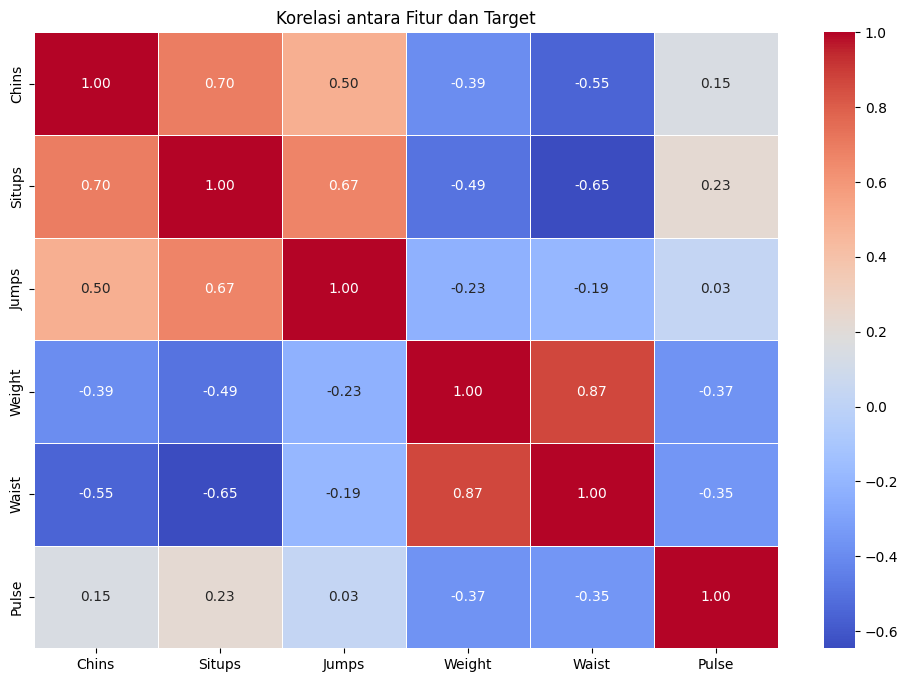

In [38]:
# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Fitur dan Target")
plt.show()

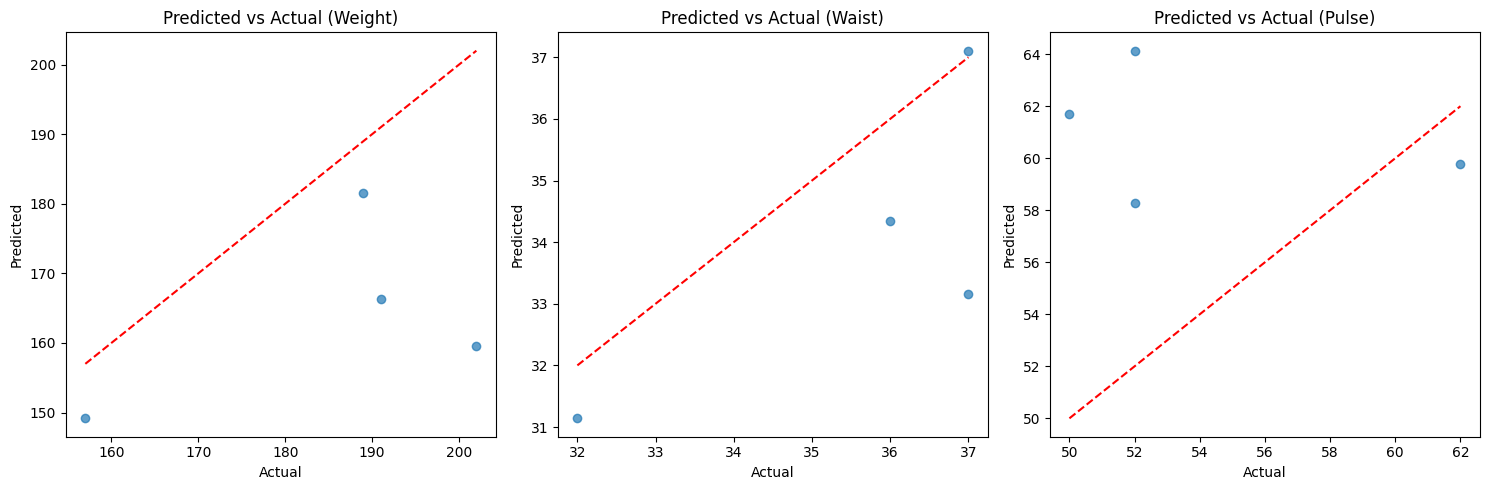

In [35]:
plt.figure(figsize=(15, 5))

for i, target_name in enumerate(linnerud.target_names):
    plt.subplot(1, 3, i + 1)  # 1 baris, 3 kolom
    plt.scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.7)
    plt.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
             [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--')  # Garis y = x
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Predicted vs Actual ({target_name})")

plt.tight_layout()
plt.show()

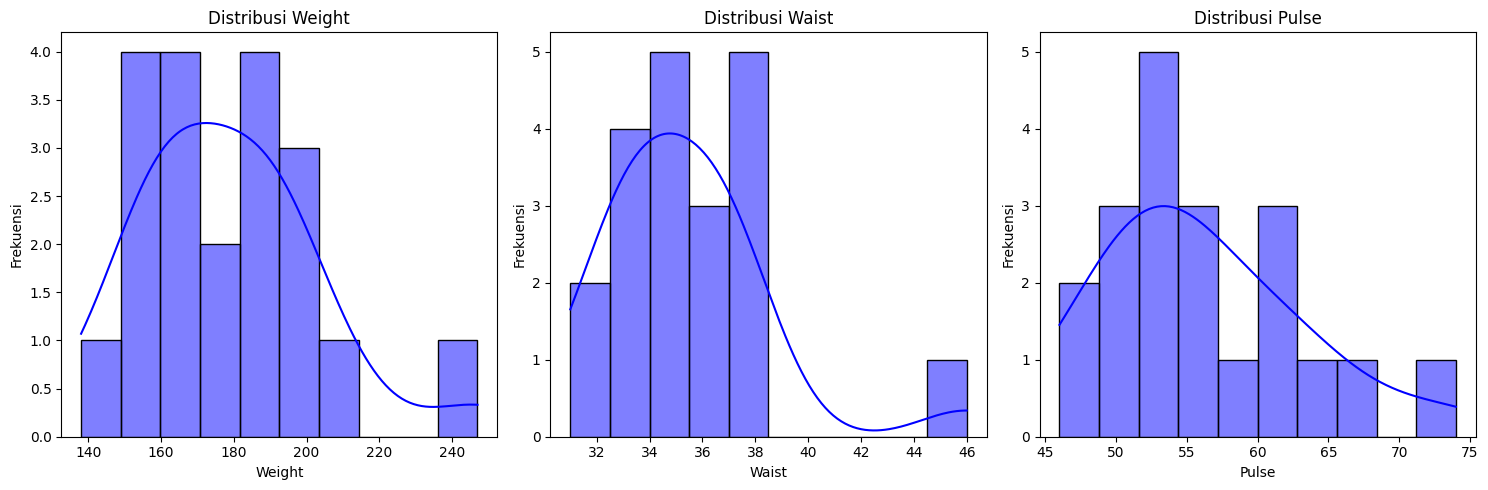

In [41]:
# Visualisasi distribusi target output (Weight, Waist, Pulse)
plt.figure(figsize=(15, 5))
for i, target_name in enumerate(linnerud.target_names):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_y[target_name], kde=True, color="blue", bins=10)
    plt.title(f"Distribusi {target_name}")
    plt.xlabel(target_name)
    plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

